## 1. Import libraries

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## load the dataset

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/penguins_size.csv')

# Drop rows with missing values (optional depending on your needs)
df = df.dropna()
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### data seperation 

In [31]:
# Encode categorical columns 'species', 'island', and 'sex'
label_enc = LabelEncoder()
df['species'] = label_enc.fit_transform(df['species'])
df['island'] = label_enc.fit_transform(df['island'])
df['sex'] = label_enc.fit_transform(df['sex'])

#split them into x and y 
y = df['sex']
x = df.drop('sex', axis= 1)
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 69)
x_train

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
86,0,1,36.3,19.5,190.0,3800.0
93,0,1,39.6,18.1,186.0,4450.0
168,1,1,50.3,20.0,197.0,3300.0
90,0,1,35.7,18.0,202.0,3550.0
110,0,0,38.1,16.5,198.0,3825.0
...,...,...,...,...,...,...
55,0,0,41.4,18.6,191.0,3700.0
96,0,1,38.1,18.6,190.0,3700.0
113,0,0,42.2,19.5,197.0,4275.0
209,1,1,49.3,19.9,203.0,4050.0


## training the model 

In [29]:
# Initialize the Random Forest classifier
clf = RandomForestClassifier()

# Train the classifier
clf.fit(x_train, y_train)



[0.05896744 0.01860959 0.19838992 0.30335971 0.13087409 0.28979925]
[2 1 1 1 2 1 1 1 1 2 1 2 1 2 2 1 2 1 2 1 2 1 1 2 1 2 1 2 1 1 2 2 1 1 2 2 1
 1 1 1 1 2 2 2 2 2 1 1 2 2 1 1 2 2 2 2 1 1 2 1 2 1 1 1 1 2 1]
235    2
284    1
15     1
222    1
63     2
      ..
298    1
193    1
288    1
335    2
152    1
Name: sex, Length: 67, dtype: int32


## features importance 

[0.05896744 0.01860959 0.19838992 0.30335971 0.13087409 0.28979925]
[2 1 1 1 2 1 1 1 1 2 1 2 1 2 2 1 2 1 2 1 2 1 1 2 1 2 1 2 1 1 2 2 1 1 2 2 1
 1 1 1 1 2 2 2 2 2 1 1 2 2 1 1 2 2 2 2 1 1 2 1 2 1 1 1 1 2 1]
235    2
284    1
15     1
222    1
63     2
      ..
298    1
193    1
288    1
335    2
152    1
Name: sex, Length: 67, dtype: int64


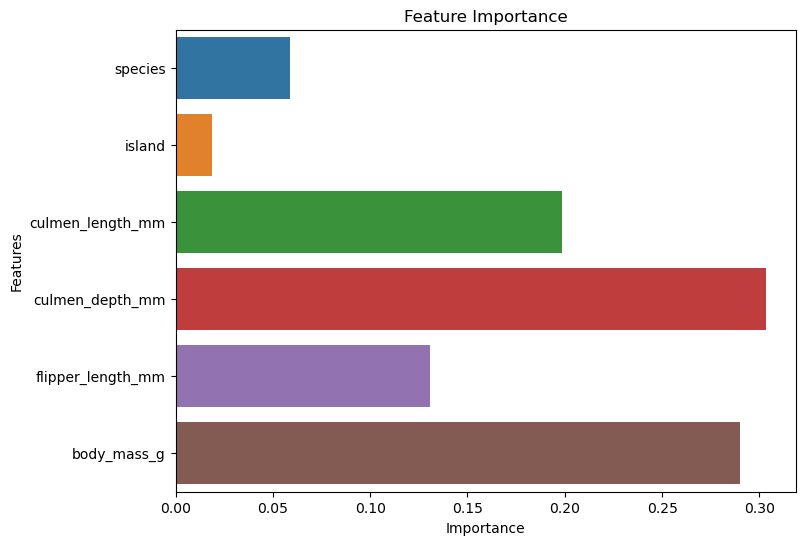

In [36]:
print(clf.feature_importances_)
print(clf.predict(x_test))
print(y_test)
# Plot feature importance
feature_importances = clf.feature_importances_
features = x.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## prediction and accurecy 

In [33]:
# Make predictions
y_pred = clf.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(clf.score(x_test, y_test))

Accuracy: 89.55%
0.8955223880597015


## ploting graph 

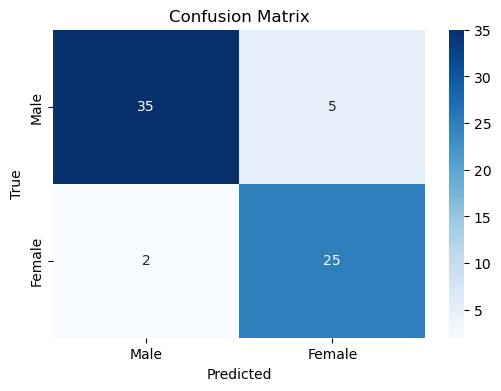

In [37]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

